In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sys.path.append('./modules')

# Importation des bibliothèques
import numpy as np
import pandas as pd

# Importation des fonctions depuis votre module
from modules.modelisation import *


c:\ProgramData\anaconda3\envs\rakuck\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


=== Génération de données d'entrainement ===
Shape des données générées (jeu 1) : (108000, 18)
                count        mean        std         min         25%  \
Categorie                                                              
Electronique  36000.0  291.298477  80.532133  144.766690  223.817999   
Livres        36000.0   22.377004   4.575244   10.457914   18.789373   
Vetements     36000.0   39.471442   9.136057   19.109708   32.542875   

                     50%         75%         max  
Categorie                                         
Electronique  280.549252  351.408027  530.763533  
Livres         22.776654   25.829380   34.940577  
Vetements      38.385169   45.368710   73.290177  


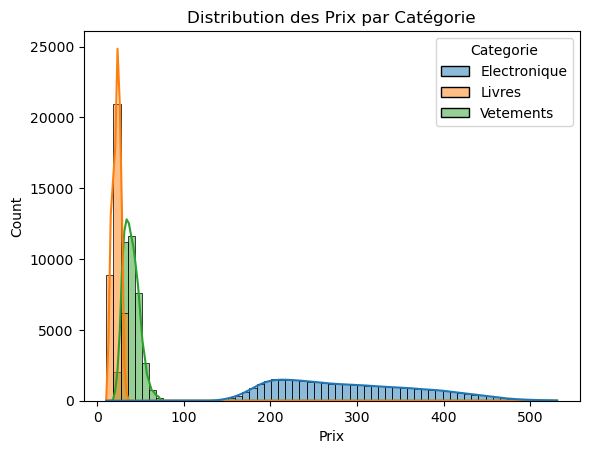

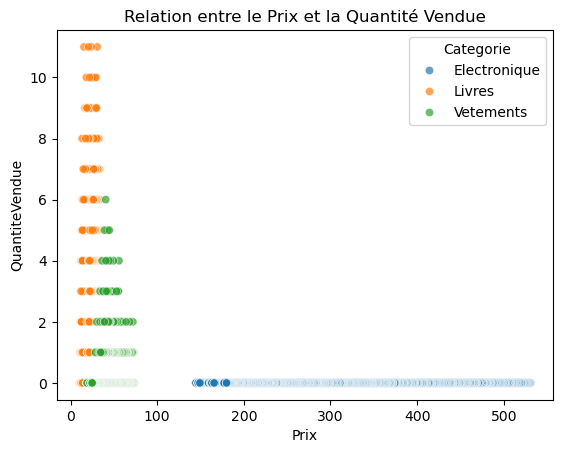


=== Génération de validation ===
Shape des données générées (jeu 2) : (27375, 18)
               count        mean        std         min         25%  \
Categorie                                                             
Electronique  9855.0  341.736414  69.676725  192.102393  289.971493   
Livres        8760.0   21.294120   2.632025   14.258182   19.342471   
Vetements     8760.0   47.266615   7.006465   30.532061   42.023698   

                     50%         75%         max  
Categorie                                         
Electronique  334.736847  390.209996  530.918704  
Livres         21.281721   23.139831   28.886598  
Vetements      46.780686   51.906351   68.162425  


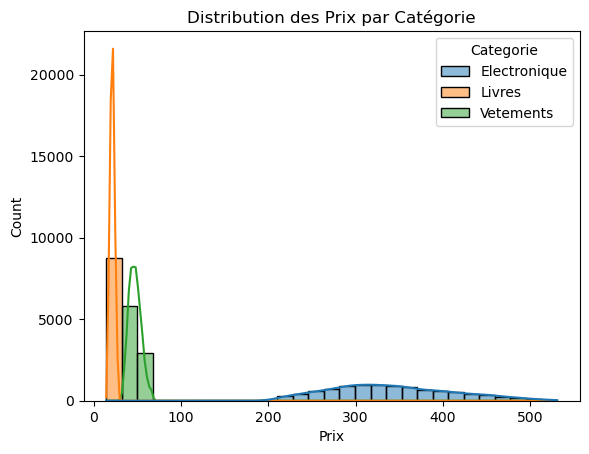

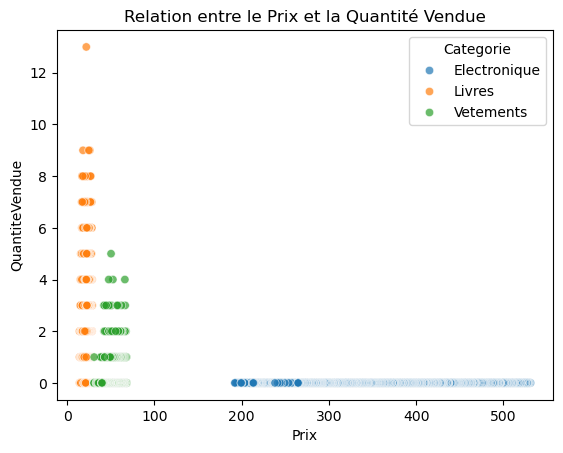


=== Vérification finale ===
Données synthétiques 1 (par défaut) : (108000, 18)
Données synthétiques 2 (personnalisées) : (27375, 18)


In [ ]:
print("=== Génération de données d'entrainement ===")
params1 = ParametresSynthese()  # Utilise les paramètres par défaut
synthese1 = SyntheseDonnees(params1)
donnees_df1 = synthese1.generer_donnees()

# Sauvegarde des données dans un fichier CSV
if not os.path.exists("../00 - Annexes/data_prepro/"):
    os.makedirs("../00 - Annexes/data_prepro/")
donnees_df1.to_csv("../00 - Annexes/data_prepro/donnees_synthetiques.csv", index=False)

# Analyse des données
print(f"Shape des données générées (jeu 1) : {donnees_df1.shape}")
synthese1.analyser_donnees(donnees_df1)

print("\n=== Génération de validation ===")

# Configuration des paramètres personnalisés
periode_personnalisee = 365
n_sku_personnalise = 25

params2 = ParametresSynthese()  # Copie des paramètres par défaut
params2.n_periodes = periode_personnalisee  # Mise à jour de la période
params2.n_skus = n_sku_personnalise  # Mise à jour du nombre de produits

synthese2 = SyntheseDonnees(params2)
donnees_df2 = synthese2.generer_donnees()

# Sauvegarde des données dans un fichier CSV
donnees_df2.to_csv("../00 - Annexes/data_prepro/donnees_validation.csv", index=False)

# Analyse des données
print(f"Shape des données générées (jeu 2) : {donnees_df2.shape}")
synthese2.analyser_donnees(donnees_df2)

# Étape 4 : Vérification des résultats
print("\n=== Vérification finale ===")
print(f"Données synthétiques 1 (par défaut) : {donnees_df1.shape}")
print(f"Données synthétiques 2 (personnalisées) : {donnees_df2.shape}")

In [3]:
donnees_df1


,Categorie,SKU,PrixInitial,DateLancement,AgeProduitEnJours,Date,Timestamp,Prix,PrixPlancher,PlancherPourcentage,Promotion,QuantiteVendue,ProbabiliteAchat,UtiliteProduit,ElasticitePrix,Remise,ErreurAleatoire,Qualite
0,Electronique,SKU1_1,423.009640,2023-01-01,0,2023-01-01,2023-01-01 00:00:00,423.911509,169.203856,0.4,0,0,1.799422e-10,-22.438386,0.054764,0.0,0.901869,0.530587
1,Electronique,SKU1_1,423.009640,2023-01-01,0,2023-01-01,2023-01-01 08:00:00,423.183663,169.203856,0.4,0,0,3.454899e-11,-24.088643,0.054764,0.0,0.174022,0.530587
2,Electronique,SKU1_1,423.009640,2023-01-01,0,2023-01-01,2023-01-01 16:00:00,422.966695,169.203856,0.4,0,0,1.633501e-10,-22.535125,0.054764,0.0,-0.042945,0.530587
3,Electronique,SKU1_1,423.009640,2023-01-01,1,2023-01-02,2023-01-02 00:00:00,422.429131,169.203856,0.4,0,0,9.524163e-11,-23.074604,0.054764,0.0,0.053530,0.530587
4,Electronique,SKU1_1,423.009640,2023-01-01,1,2023-01-02,2023-01-02 08:00:00,422.765847,169.203856,0.4,0,0,3.295592e-11,-24.135850,0.054764,0.0,0.390245,0.530587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107995,Vetements,SKU3_20,45.011399,2023-01-01,598,2024-08-21,2024-08-21 08:00:00,24.835145,22.505699,0.5,0,0,9.919637e-07,-13.823578,0.054764,0.0,0.082910,0.966630
107996,Vetements,SKU3_20,45.011399,2023-01-01,598,2024-08-21,2024-08-21 16:00:00,25.173896,22.505699,0.5,0,0,1.502233e-05,-11.105958,0.054764,0.0,0.421661,0.966630
107997,Vetements,SKU3_20,45.011399,2023-01-01,599,2024-08-22,2024-08-22 00:00:00,24.490695,22.505699,0.5,0,0,1.882911e-06,-13.182690,0.054764,0.0,-0.236800,0.966630
107998,Vetements,SKU3_20,45.011399,2023-01-01,599,2024-08-22,2024-08-22 08:00:00,24.782744,22.505699,0.5,0,0,4.821855e-07,-14.544936,0.054764,0.0,0.055249,0.966630


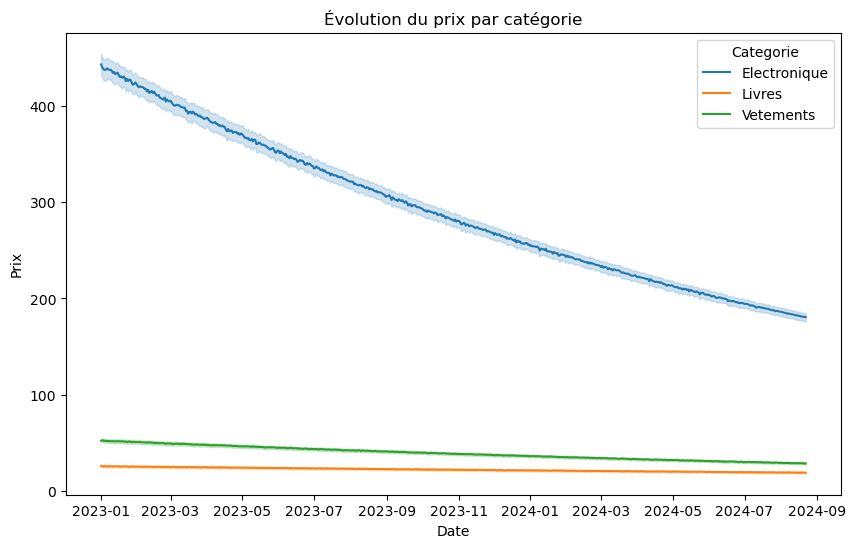

In [4]:
# figsize=(10, 6)
plt.figure(figsize=(10, 6))

# Exemple de visualisation
sns.lineplot(data=donnees_df1, x='Date', y='Prix', hue='Categorie')
plt.title('Évolution du prix par catégorie')
plt.show()


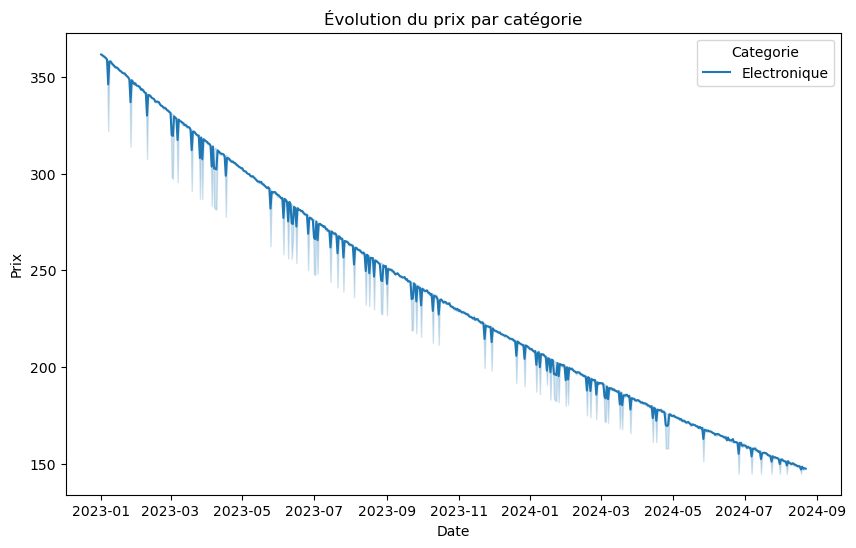

In [5]:
data = donnees_df1.query("SKU == 'SKU1_5'")
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date', y='Prix', hue='Categorie')
plt.title('Évolution du prix par catégorie')
plt.show()